In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Data Collection

In [8]:
# Loading the dataset as Pandas dataframe
wine_dataset = pd.read_csv('redwine.csv')
wine_dataset.shape

(1599, 12)

In [12]:
#first five rows of the dataset
wine_dataset.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
534,10.0,0.480,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,6
30,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.99580,3.35,0.54,10.1,5
734,7.7,0.560,0.20,2.0,0.075,9.0,39.0,0.99870,3.48,0.62,9.3,5
101,7.8,0.500,0.30,1.9,0.075,8.0,22.0,0.99590,3.31,0.56,10.4,6
1027,6.4,0.795,0.00,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5


In [14]:
# checking missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

we don't have any missing value so we can proceed with our analysis

Data Analysis and Visualization

In [15]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


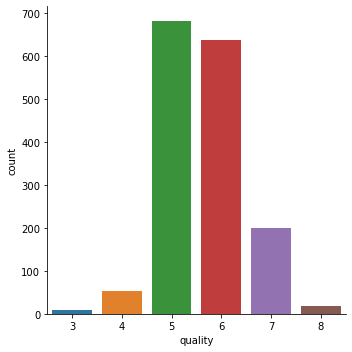

In [16]:
# number of values for each quality 
sns.catplot(x='quality', data = wine_dataset, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

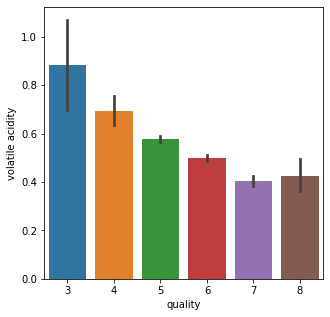

In [17]:
# volatile acidity vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data =wine_dataset)

In [ ]:
Volatile acidity is inversionaly propotional to quality

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

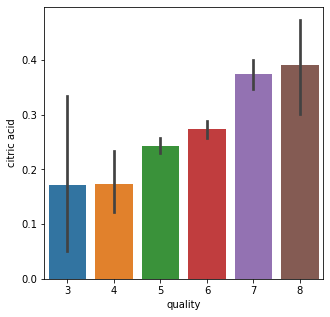

In [18]:
# citric acid vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data =wine_dataset)

citric acid content is directly propotional to quality 

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

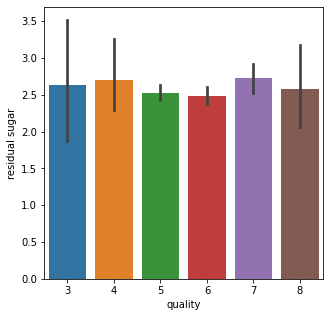

In [19]:
# residual sugar vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='residual sugar', data =wine_dataset)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

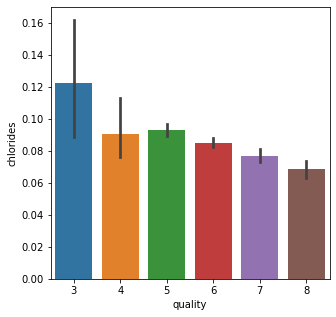

In [57]:
# chlorides vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='chlorides', data =wine_dataset)

In [58]:
#larger the quantity of chloride bad is the quality of wine

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

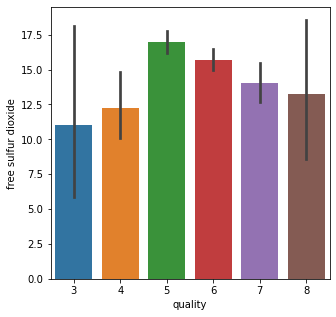

In [60]:
# free sulphur dioxide vs quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data =wine_dataset)

Corelation

In [20]:
correlation = wine_dataset.corr()

<AxesSubplot:>

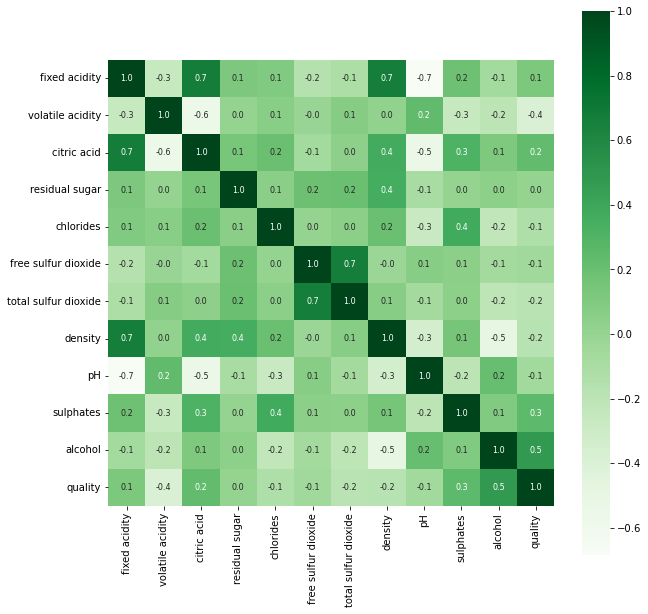

In [25]:
#constructing a heat map to understand correlationbetween columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt = '.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [26]:
# Alcohol, Sulphates, citric acid and fixed acidity are directly propotional to the quality of wine
#  volatile acid, chlorides,free sulphur dioxide, Total sulphur dioxide,density, ph are inversionaly propotional to quality
# Residual sugar content is almost the same in all  the wines, so it will not impact the Quality analysis

Data Preprocessing

In [33]:
# seprate the data and label
X = wine_dataset.drop('quality', axis =1)

In [34]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [35]:
Y = wine_dataset['quality'].apply(lambda y_value: 1if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train Test Data

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [37]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1599,) (1279,) (320,)


Model Training:
Random Forest classifier

In [38]:
model = RandomForestClassifier()

In [39]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model  Evaluation

In [40]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


out of 100 values our model can predict aarounnd 93 correct values, which is really really good 

Building a Pedictive System

In [53]:
input_data = (7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4)

In [54]:
#changing the input datatyp to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [55]:
#rehaping the data as we are  predicting the level for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [56]:
prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
